<h1> Projeto de Ciência de Dados - Classificadores de preços de veículos a partir de suas características



---

### **Alunos:**

Jefter Santiago Mares, Nº USP: 12559016; <br>
Joey Gabriel dos Santos Silva, Nº USP: 12689297; <br>
Marcos Vinicius Tomás Olegario, Nº USP: 12688636;

---


### Bibliotecas necessárias:

In [614]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split


from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline

import math
from sklearn.metrics import r2_score, mean_squared_error

from statsmodels.formula.api import ols


In [615]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1 - Formulação do problema

O projeto em questão tem como objetivo responder a pergunta: "É possível classificar o preço de veículos a partir de suas características?". <br>
Para isso, selecionamos uma base de dados com diferentes modelos de veículos e 15 atributos de características de cada.<br>

A base de dados possui 16 colunas que representam:
* `make`: Marca do carro (BMW, Toyota...)
* `model`: Modelo do carro
* `year`: Ano de frabricação do carro
* `engine_feul_type`: Tipo de combustível que o motor precisa
* `engine_hp`: Potência do motor
* `engine_cylinders`: Número de cilíndros do motor
* `transmission_type`: Automático ou Manual
* `driven_wheels`: Tipos de roda
* `number_of_doors`: Número de portas
* `market_category`: Categoria de mercado
* `vehicle_size`: se é compacto ou não
* `vehicle_style`: Sedã ou conversível
* `highway_mpg`: Milhas por galão de combustível na estrada
* `city_mpg`: Milhas por galão de combustível na cidade
* `popularity`: Número de vezes que o carro foi mencionado no twitter
* `msrp`: Preço de varejo sugerido pelo fabricante

Primeiramente foi feita a limpeza e analise exploratória dos dados, além disso, também fizemos a descrição estatística da base de dados escolhida.
<br>Em seguida foi implementado os modelos de classificação vistos no decorrer do semestre, como os classificadores Bayesianos (paramétrico e não paramétrico) - com testes para escolha do melhor paramêtro no segundo caso, regressão linear, método dos k-vizinhos e Naive-Bayes. 
<br>Por fim, fizemos uma avaliação dos classificadores afim de eleger o mais adequado para o projeto. 

# 2 - Preparação de dados


In [616]:
path = "/content/drive/MyDrive/Colab Notebooks/Introdução à Ciência de Dados/Trabalho Final - Introducao a ciencia de dados/data/CARROS.csv"
# path = "/content/drive/MyDrive/4º Semestre/Introdução Ciência de Dados/CARROS.csv"

data = pd.read_csv(path, header=(0))

In [617]:
print("Número de linhas e colunas do conjunto:", data.shape)

print("\nConjunto de Entrada:")
data.head(10)

Número de linhas e colunas do conjunto: (11914, 16)

Conjunto de Entrada:


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
5,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,31200
6,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,26,17,3916,44100
7,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,39300
8,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,36900
9,BMW,1 Series,2013,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,27,18,3916,37200


A partir destes dados, conseguimos extrair algumas informações:

In [618]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

Onde vemos que 7 dos 15 atributos são nominais e 8 são dividios entre inteiros e float. <br>
Além disso, vamos verificar quantos tipos diferentes de marcas existem:

In [619]:
ylabel = data.columns[-1]
np_data = data.to_numpy()
nrow, ncol =  data.shape

X = np_data[:,0:ncol-1]
Y = np_data[:,0]

In [620]:
print("Número de classes:",len(np.unique(Y)))

Número de classes: 48


Dos atributos numéricos, conseguimos extrair as seguintes informações:

In [621]:
data.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


# 3 - Limpeza dos dados:

Inicialmente, vamos fazer uma preparação dos dados. Temos quase 12k de carros na planílha, e algumas inconsistências:


*   Alguns nomes de colunas contém espaços e outros underlines "_" (como `Engine HP` and `Driven_Wheels`);
*   Além disso, algumas colunas possuem nomes com iniciais maiúsculas e outras não.

Vamos começar as análises ajustando isso.



In [622]:
# Começamos deixando todas os nomes de colunas com letras minúsculas e trocando os espaços por '_'

data.columns = data.columns.str.lower().str.replace(' ', '_')
data.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [623]:
# Vamos começar preparando as colunas com valores string

string_columns= list(data.dtypes[data.dtypes == 'object'].index)
string_columns

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [624]:
# Vamos deixar todos os atributos em minúsculo e substituir espaços por '_'

for col in string_columns:
    data[col] = data[col].str.lower().str.replace(' ', '_')

In [625]:
# Conferindo os dados novamente:

data.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


Agora, verificamos os valores nulos contidos no conjunto:

In [626]:
print("Análise conjunto de treinamento:")
data.isnull().sum().sort_values(ascending=False).head(10)

Análise conjunto de treinamento:


market_category      3742
engine_hp              69
engine_cylinders       30
number_of_doors         6
engine_fuel_type        3
make                    0
model                   0
year                    0
transmission_type       0
driven_wheels           0
dtype: int64

Vemos que os atributos de `market_category` e `engine_fuel_type` possuem valores nulos e são nominais. Para não perder estes valores, vamos substituí-los pela moda da coluna. Os outros atributos nulos serão substituídos pela mediana de cada coluna.

In [627]:
data['market_category'] = data['market_category'].fillna(data['market_category'].mode()[0])
data['engine_fuel_type'] = data['engine_fuel_type'].fillna(data['engine_fuel_type'].mode()[0])

data['engine_hp'] = data['engine_hp'].fillna(data['engine_hp'].median())
data['engine_cylinders'] = data['engine_cylinders'].fillna(data['engine_cylinders'].median())
data['number_of_doors'] = data['number_of_doors'].fillna(data['number_of_doors'].median())

Conferindo novamente se ainda restam NaN:

In [628]:
print("Análise conjunto de treinamento:")
data.isnull().sum().sort_values(ascending=False).head(10)

Análise conjunto de treinamento:


make                 0
model                0
year                 0
engine_fuel_type     0
engine_hp            0
engine_cylinders     0
transmission_type    0
driven_wheels        0
number_of_doors      0
market_category      0
dtype: int64

# Análise Exploratória dos Dados

Vamos inicialmente explorar a distribuição dos valores de preço, `msrp`, nosso valor alvo.

Text(0.5, 1.0, 'Distribuição dos preços (MSRP)')

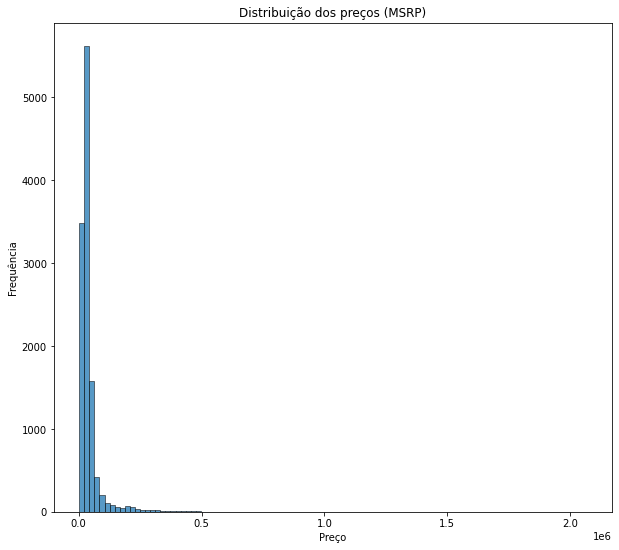

In [629]:
plt.figure(figsize=(10, 9))

sns.histplot(data.msrp, bins=100)
plt.ylabel('Frequência')
plt.xlabel('Preço')
plt.title('Distribuição dos preços (MSRP)')


Podemos ver que a distribuição é uma distribuição de cauda longa e a maioria dos dados está no lado esquerdo do gráfico (menor que 1.0e6). 
<br>Vamos então olhar melhor os valores de `msrp` menores que 100.000, onde está a maioria dos dados.

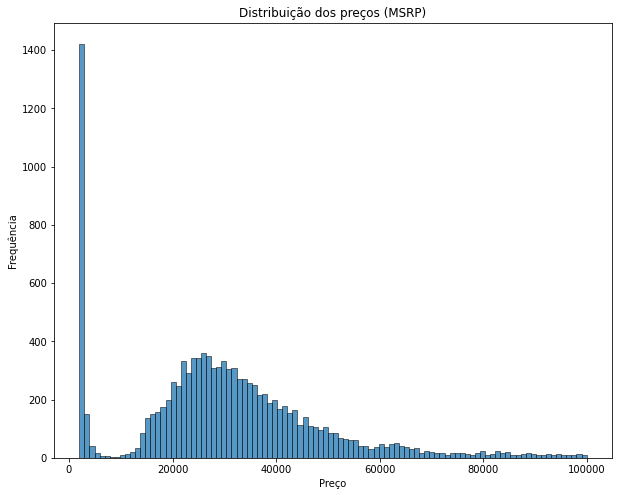

In [630]:
plt.figure(figsize=(10, 8))

sns.histplot(data.msrp[data.msrp < 100000], bins=100)
plt.ylabel('Frequência')
plt.xlabel('Preço')
plt.title('Distribuição dos preços (MSRP)')

plt.show()


Agora podemos ver que os dados estão aproximadamente em uma curva gaussiana, mas, no geral, os dados têm uma variação muito alta que afetará nossa precisão na previsão dos preços. <br>
Para melhorar a precisão de nosso modelo, usaremos valores de log do msrp.

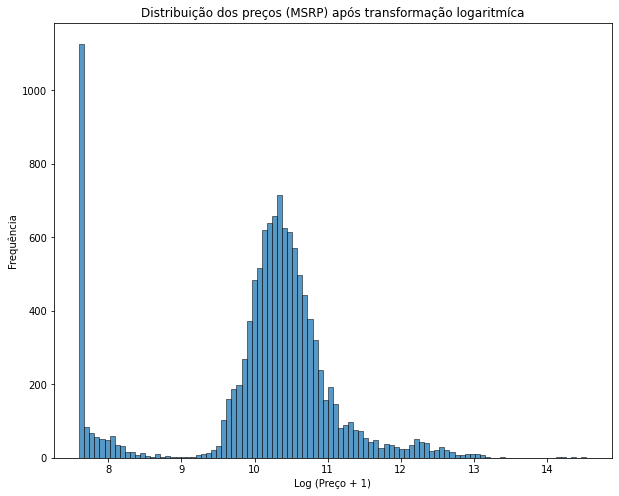

In [631]:
log_price = np.log1p(data.msrp)

plt.figure(figsize=(10, 8))

sns.histplot(log_price, bins=100)
plt.ylabel('Frequência')
plt.xlabel('Log (Preço + 1)')
plt.title('Distribuição dos preços (MSRP) após transformação logaritmíca')

plt.show()

## Identificando outliers

In [632]:
num_col = data.select_dtypes(include = [np.number])
cat_col = data.select_dtypes(exclude = [np.number])

In [633]:
for i in num_col:
    fig = px.box(data, x = data[i])
    fig.update_traces(fillcolor = '#C9A26B')
    fig.show()

In [634]:
data.head(250)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,nissan,300zx,1995,regular_unleaded,222.0,6.0,manual,rear_wheel_drive,2.0,performance,compact,coupe,22,17,2009,2702
246,nissan,300zx,1995,regular_unleaded,222.0,6.0,manual,rear_wheel_drive,2.0,performance,compact,convertible,22,17,2009,3101
247,nissan,300zx,1996,regular_unleaded,300.0,6.0,manual,rear_wheel_drive,2.0,performance,compact,coupe,22,16,2009,3510
248,nissan,300zx,1996,regular_unleaded,222.0,6.0,manual,rear_wheel_drive,2.0,performance,compact,coupe,22,17,2009,3107


In [635]:
s1 = data.shape
clean = data[['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'msrp']]
for i in clean.columns:
    qt1 = data[i].quantile(0.25)
    qt3 = data[i].quantile(0.75)
    iqr =  qt3 - qt1
    lower = qt1-(1.5*iqr)
    upper = qt3+(1.5*iqr)
    min_in = data[data[i]<lower].index
    max_in = data[data[i]>upper].index
    data.drop(min_in, inplace = True)
    data.drop(max_in, inplace = True)
s2 = data.shape
outliers = s1[0] - s2[0]
print("Deleted outliers: ", outliers)

Deleted outliers:  1409


## Relação entre o MSRP e outros atributos

In [636]:
fig = px.scatter(data, x = 'year', y = 'msrp', color = 'engine_cylinders')
fig.show()

- Os preços de veículos começaram a ter grande aumento a partir de 2001.


In [637]:
fig = px.scatter(data, x = 'engine_hp', y = 'msrp', color = 'engine_cylinders')
fig.show()

In [638]:
fig = px.scatter(data, x = 'number_of_doors', y = 'msrp', color = 'engine_cylinders')
fig.show()

fig = px.scatter(data, x = 'engine_cylinders', y = 'msrp', color = 'engine_cylinders')
fig.show()
fig = px.scatter(data, x = 'highway_mpg', y = 'msrp', color = 'engine_cylinders')
fig.show()
fig = px.scatter(data, x = 'city_mpg', y = 'msrp', color = 'engine_cylinders')
fig.show()
fig = px.scatter(data, x = 'popularity', y = 'msrp', color = 'engine_cylinders')
fig.show()

# Seleção e Ajuste do Modelo

## Regressão Linear

Vamos avaliar a correlação entre as variáveis, a fim de analisar quais são relevantes para a determinação do preço do carro.

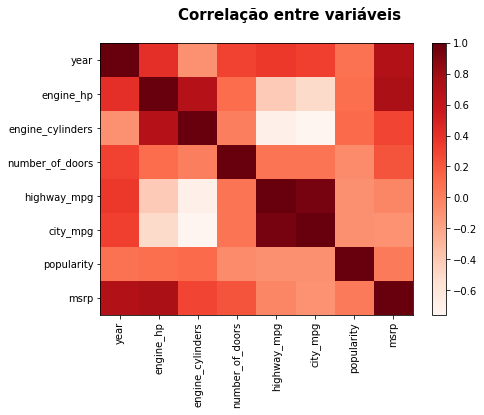

In [639]:
corr = data.corr()

plt.figure(figsize=(7, 5))
plt.imshow(corr, cmap = 'Reds', interpolation = 'none', aspect = 'auto')

plt.xticks(range(len(corr)), corr.columns, rotation = 'vertical')
plt.yticks(range(len(corr)), corr.columns)
plt.suptitle("Correlação entre variáveis", fontsize = 15, fontweight = 'bold')

plt.colorbar()
plt.grid(False)
plt.show()

A partir dessa análise, vemos que os atributos de `engine_hp`, `engine_cylinders` e `popularity` contribuem fortemente para o preço do veíclo.
<br>Além disso, a equipe optou por analisar também a relação entre os atributos de `highway_mpg` e `city_mpg` para o preço do carro, pois acreditamos que esses atributos influenciam bem para o preço do carro.

Portanto, iniciamos realizando a limpeza dos dados de modo a remover as colunas que não usaremos.

In [640]:
data_modified = data
data_modified.drop(['make', 'model', 'year', 'engine_fuel_type', 'transmission_type', 'driven_wheels', 'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style'], axis = 1, inplace = True)
data_modified.head(10)

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity,msrp
0,335.0,6.0,26,19,3916,46135
1,300.0,6.0,28,19,3916,40650
2,300.0,6.0,28,20,3916,36350
3,230.0,6.0,28,18,3916,29450
4,230.0,6.0,28,18,3916,34500
5,230.0,6.0,28,18,3916,31200
6,300.0,6.0,26,17,3916,44100
7,300.0,6.0,28,20,3916,39300
8,230.0,6.0,28,18,3916,36900
9,230.0,6.0,27,18,3916,37200


### Normalização dos dados


In [641]:
# Convertendo para o formato Numpy

np_data = data_modified.to_numpy()
nrow, ncol = data_modified.shape

X = np_data[:,0:ncol-1]
Y = np_data[:,-1]

In [642]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

print('Dados transformados:')
print('Media: ', np.mean(X, axis = 0))
print('Desvio Padrao:', np.std(X, axis = 0))

Dados transformados:
Media:  [-1.62332467e-17  2.43498700e-16 -2.11032207e-16 -1.51510303e-16
 -2.16443289e-17]
Desvio Padrao: [1. 1. 1. 1. 1.]


In [643]:
from sklearn.model_selection import train_test_split

# Dividindo em conjunto de teste e treinamento
p = 0.8 # Fração de elementos que iremos usar no treinamento
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size = p, random_state = 0)

In [644]:
y_train_ln = np.log1p(y_train)
y_test_ln = np.log1p(y_test)

In [645]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

model1 = LinearRegression()
model1.fit(x_train, y_train_ln)

LinearRegression()

In [646]:
# Validação do Modelo
y_pred = model1.predict(x_test)

print("R2:", r2_score(y_test_ln, y_pred))

R2: 0.49732701280097047


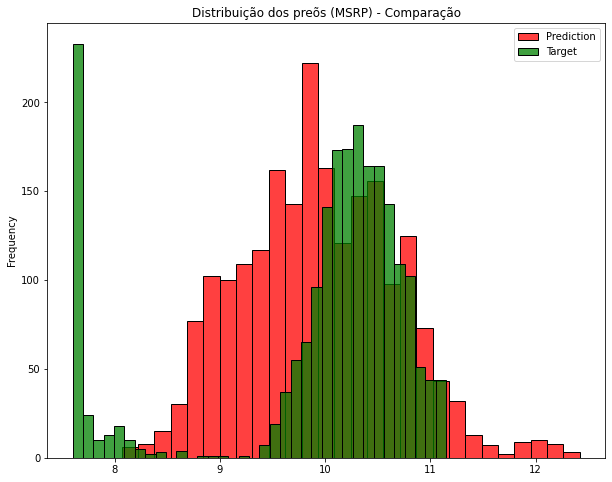

In [647]:
plt.figure(figsize=(10, 8))

sns.histplot(y_pred, label='Prediction', color='red')
sns.histplot(y_test_ln, label='Target', color = "green")

plt.ylabel('Frequency')
plt.title('Distribuição dos preõs (MSRP) - Comparação')

plt.legend()
plt.show()

O modelo de regressão linear não possui uma acurácia boa, por isso resolvemos testar outro modelo.

## Random Forest

In [648]:
X = data.drop('msrp', axis = 1)
y = data['msrp']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [649]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

rfr = RandomForestRegressor(n_estimators = 40)
rfr_algo = make_pipeline(rfr)
rfr_algo.fit(X_train, y_train)
rfr_pred = rfr_algo.predict(X_test)

print('R2 Score : ', r2_score(y_test, rfr_pred))
print('MSE : ', math.sqrt(mean_squared_error(y_test, rfr_pred)))

R2 Score :  0.9247970035328235
MSE :  4311.005961787037


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



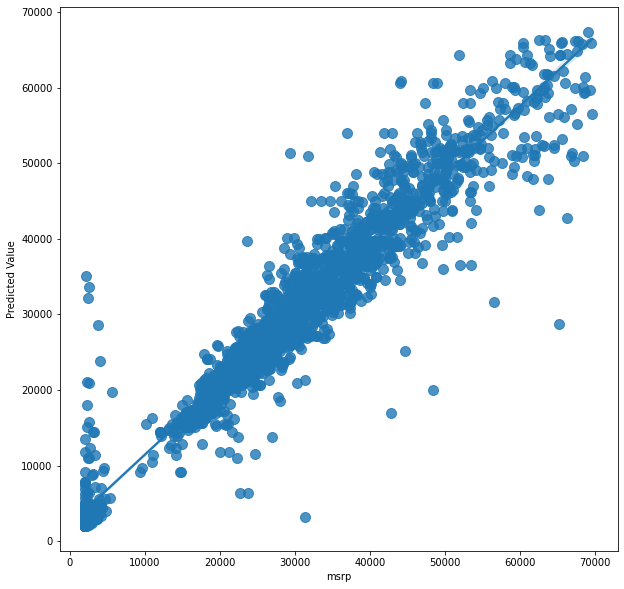

In [650]:
plt.figure(figsize=(10,10))
plt.ylabel("Predicted Value")
sns.regplot(y_test, rfr_pred, fit_reg=True, scatter_kws={"s": 100})

O modelo usando `Random Forest` apresentou uma acurácia muito superior à `Regressão Linear Multivariada`, com Score R2 maior que $0.92$, além de ser de simples implementação.



---

